In [195]:
import numpy as np
import pandas as pd

In [196]:
df = pd.read_csv('spam.csv',encoding='latin-1')

In [197]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
108,ham,I know! Grumpy old people. My mom was like you...,NaN,NaN,NaN
808,ham,I am taking half day leave bec i am not well,NaN,NaN,NaN
2413,ham,Lol please do. Actually send a pic of yourself...,NaN,NaN,NaN
2726,ham,No i am not having not any movies in my laptop,NaN,NaN,NaN
5427,spam,Santa Calling! Would your little ones like a c...,NaN,NaN,NaN


In [198]:
df.shape

(5572, 5)

In [199]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1. Data Cleaning

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [201]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [202]:
df.sample(5)

,v1,v2
2253,ham,Lol enjoy role playing much?
2666,ham,"* Was a nice day and, impressively, i was sens..."
1029,ham,"Its good, we'll find a way"
2638,ham,Am in gobi arts college
2867,ham,"Aight, tomorrow around &lt;#&gt; it is"


In [203]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
4021,ham,U gd lor go shopping i got stuff to do. U wan ...
271,ham,"Night has ended for another day, morning has c..."
2185,ham,Purity of friendship between two is not about ...
944,ham,I sent my scores to sophas and i had to do sec...
4238,ham,"Sez, hows u & de arab boy? Hope u r all good g..."


In [204]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [205]:
df['target'] = encoder.fit_transform(df['target'])

In [206]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [207]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [208]:
# check for duplicate values
df.duplicated().sum()

403

In [209]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [210]:
df.duplicated().sum()

0

In [211]:
df.shape

(5169, 2)

## 2.EDA

In [212]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [213]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

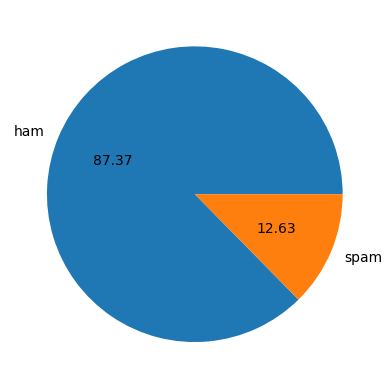

In [214]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [215]:
# Data is imbalanced

In [216]:
import nltk

In [217]:
!pip install nltk

In [218]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [219]:
df['num_characters'] = df['text'].apply(len)

In [220]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [221]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [222]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [223]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [224]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [225]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [226]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [227]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

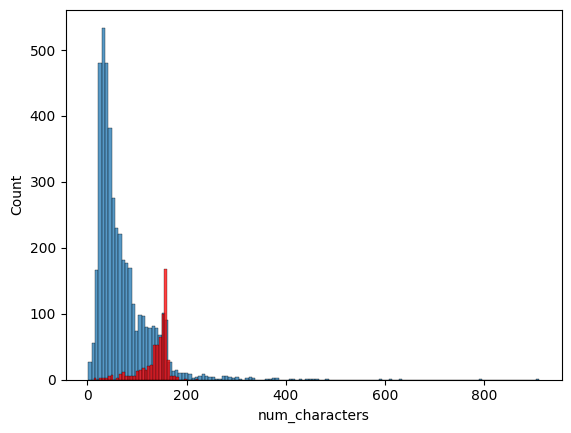

In [228]:
import seaborn as sns
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color = 'red')

<Axes: xlabel='num_words', ylabel='Count'>

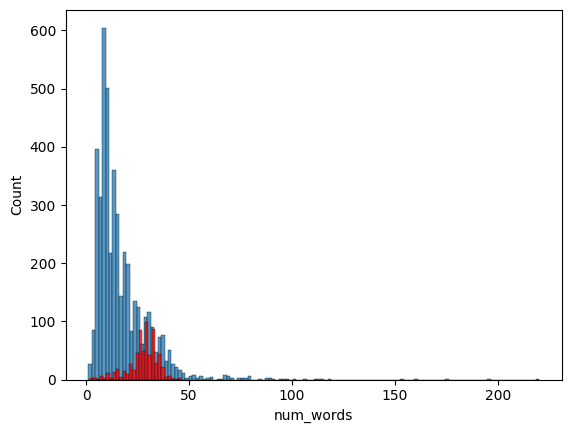

In [229]:
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color = 'red')

<Figure size 1500x600 with 0 Axes>

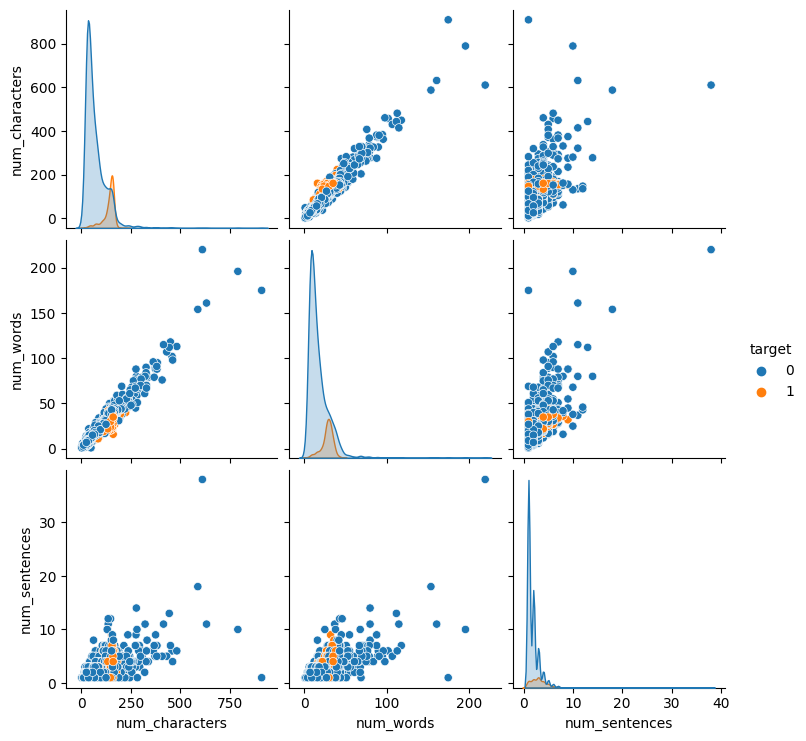

In [264]:
plt.figure(figsize=(15,6))
sns.pairplot(df,hue = 'target')


In [231]:
df.corr()

<ipython-input-231-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<ipython-input-232-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

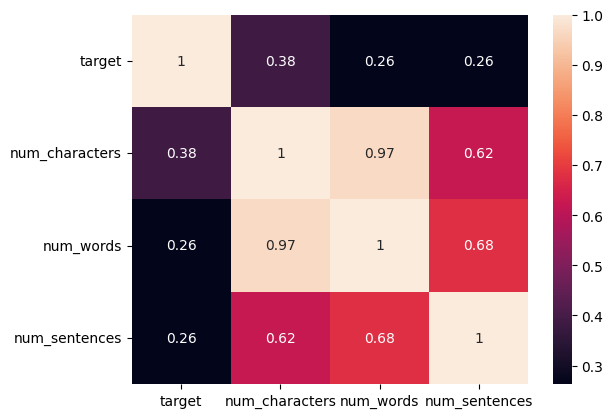

In [232]:
sns.heatmap(df.corr(),annot=True)

3. DATA PREPROCESSING

*   lowercase
*   tokenization
*   Removing special char
*   removing stop words and punctuation
*   stemming







In [233]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [234]:
import string
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [235]:
def transform_text(text):
  text = text.lower()

  text = nltk.word_tokenize(text)

  y = []
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))
  return " ".join(y)

In [236]:
transform_text("Hey rudra i heard , how are you?")

'hey rudra heard'

In [237]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [238]:
transform_text(df['text'][0])

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [239]:
df['transform_text']=df['text'].apply(transform_text)
df.head()

,target,text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [240]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [241]:
spam_wc = wc.generate(df[df['target']==1]['transform_text'].str.cat(sep=" "))

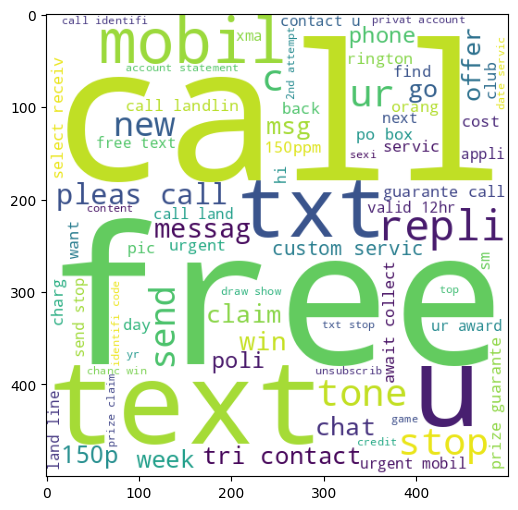

In [242]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

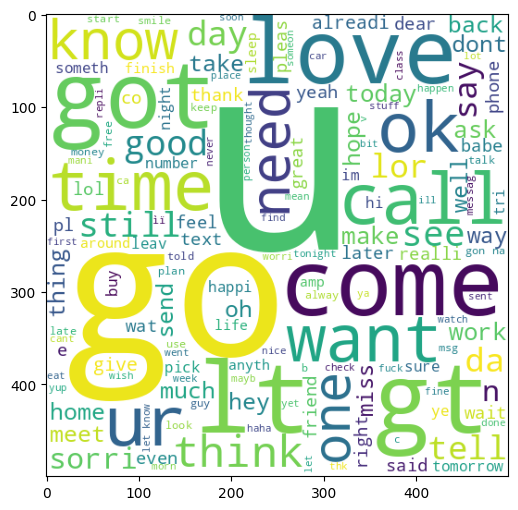

In [243]:
ham_wc = wc.generate(df[df['target']==0]['transform_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [244]:
spam_corpus = []
for msg in df[df['target']==1]['transform_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)
len(spam_corpus)

9939

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'call'),
  Text(1, 0, 'free'),
  Text(2, 0, '2'),
  Text(3, 0, 'txt'),
  Text(4, 0, 'text'),
  Text(5, 0, 'u'),
  Text(6, 0, 'ur'),
  Text(7, 0, 'mobil'),
  Text(8, 0, 'stop'),
  Text(9, 0, 'repli'),
  Text(10, 0, 'claim'),
  Text(11, 0, '4'),
  Text(12, 0, 'prize'),
  Text(13, 0, 'get'),
  Text(14, 0, 'new'),
  Text(15, 0, 'servic'),
  Text(16, 0, 'tone'),
  Text(17, 0, 'send'),
  Text(18, 0, 'urgent'),
  Text(19, 0, 'nokia'),
  Text(20, 0, 'contact'),
  Text(21, 0, 'award'),
  Text(22, 0, 'phone'),
  Text(23, 0, 'cash'),
  Text(24, 0, 'pleas'),
  Text(25, 0, 'week'),
  Text(26, 0, 'win'),
  Text(27, 0, 'c'),
  Text(28, 0, 'collect'),
  Text(29, 0, 'min')])

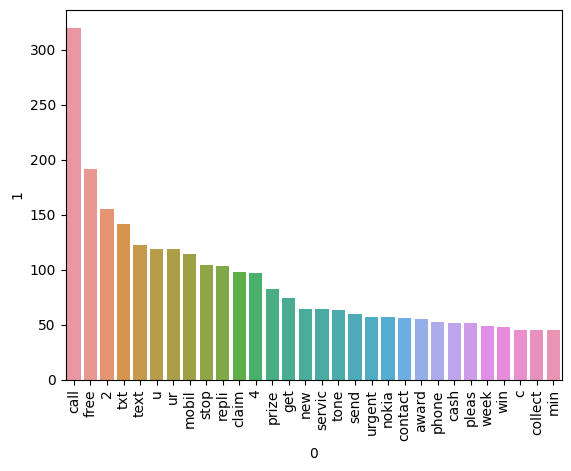

In [245]:
from collections import Counter
# pd.DataFrame(Counter(spam_corpus).most_common(30))
sns.barplot(x= pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')

In [246]:
ham_corpus = []
for msg in df[df['target']==0]['transform_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)
len(ham_corpus)

35404

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'u'),
  Text(1, 0, 'go'),
  Text(2, 0, 'get'),
  Text(3, 0, 'gt'),
  Text(4, 0, 'lt'),
  Text(5, 0, '2'),
  Text(6, 0, 'come'),
  Text(7, 0, 'got'),
  Text(8, 0, 'know'),
  Text(9, 0, 'like'),
  Text(10, 0, 'call'),
  Text(11, 0, 'time'),
  Text(12, 0, 'ok'),
  Text(13, 0, 'love'),
  Text(14, 0, 'good'),
  Text(15, 0, 'want'),
  Text(16, 0, 'ur'),
  Text(17, 0, 'day'),
  Text(18, 0, 'need'),
  Text(19, 0, 'one'),
  Text(20, 0, 'lor'),
  Text(21, 0, '4'),
  Text(22, 0, 'home'),
  Text(23, 0, 'think'),
  Text(24, 0, 'see'),
  Text(25, 0, 'take'),
  Text(26, 0, 'still'),
  Text(27, 0, 'da'),
  Text(28, 0, 'tell'),
  Text(29, 0, 'make')])

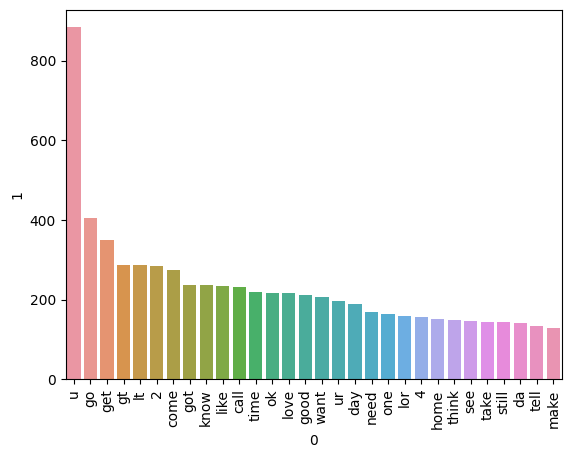

In [247]:
from collections import Counter
# pd.DataFrame(Counter(spam_corpus).most_common(30))
sns.barplot(x= pd.DataFrame(Counter(ham_corpus).most_common(30))[0], y = pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')

4. MODEL BUILDING

In [248]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()
x = tfidf.fit_transform(df['transform_text']).toarray()
y = df['target'].values

In [249]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [250]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score
gb = GaussianNB()
mb = MultinomialNB()
nb = BernoulliNB()
gb.fit(x_train,y_train)
mb.fit(x_train,y_train)
nb.fit(x_train,y_train)

BernoulliNB()

In [251]:
ygb = gb.predict(x_test)
ymb = mb.predict(x_test)
ynb = nb.predict(x_test)
print("Gaussian bayes : ")
print(accuracy_score(y_test,ygb))
print(confusion_matrix(y_test,ygb))
print(precision_score(y_test,ygb))

Gaussian bayes : 
0.8713733075435203
[[774 111]
 [ 22 127]]
0.5336134453781513


In [252]:
print("Multinomial bayes : ")
print(accuracy_score(y_test,ymb))
print(confusion_matrix(y_test,ymb))
print(precision_score(y_test,ymb))

Multinomial bayes : 
0.9458413926499033
[[885   0]
 [ 56  93]]
1.0


In [253]:
print("Bernuli bayes : ")
print(accuracy_score(y_test,ynb))
print(confusion_matrix(y_test,ynb))
print(precision_score(y_test,ynb))

Bernuli bayes : 
0.9661508704061895
[[881   4]
 [ 31 118]]
0.9672131147540983


In [254]:
# tfidf --> MNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [255]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [256]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [257]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [258]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, x_train ,y_train,x_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9680851063829787
Precision -  0.9754098360655737
For  KN
Accuracy -  0.8887814313346228
Precision -  1.0
For  NB
Accuracy -  0.9458413926499033
Precision -  1.0
For  DT
Accuracy -  0.9313346228239845
Precision -  0.8611111111111112
For  LR
Accuracy -  0.9564796905222437
Precision -  0.956140350877193
For  RF
Accuracy -  0.9709864603481625
Precision -  1.0
For  AdaBoost
Accuracy -  0.9671179883945842
Precision -  0.9752066115702479
For  BgC
Accuracy -  0.9632495164410058
Precision -  0.8992805755395683
For  ETC
Accuracy -  0.9729206963249516
Precision -  0.984
For  GBDT
Accuracy -  0.9574468085106383
Precision -  0.972972972972973
For  xgb
Accuracy -  0.9729206963249516
Precision -  0.9618320610687023


In [259]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.888781,1.000000
2,NB,0.945841,1.000000
5,RF,0.970986,1.000000
8,ETC,0.972921,0.984000
0,SVC,0.968085,0.975410
6,AdaBoost,0.967118,0.975207
9,GBDT,0.957447,0.972973
10,xgb,0.972921,0.961832
4,LR,0.956480,0.956140
7,BgC,0.963250,0.899281


In [260]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.888781
1,NB,Accuracy,0.945841
2,RF,Accuracy,0.970986
3,ETC,Accuracy,0.972921
4,SVC,Accuracy,0.968085
5,AdaBoost,Accuracy,0.967118
6,GBDT,Accuracy,0.957447
7,xgb,Accuracy,0.972921
8,LR,Accuracy,0.956480
9,BgC,Accuracy,0.963250


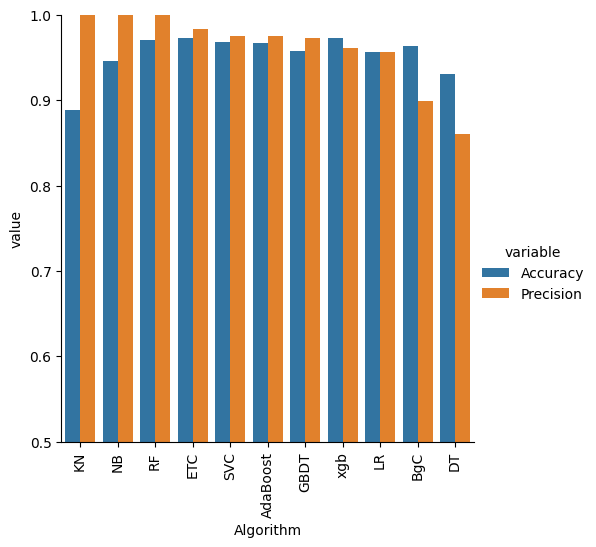

In [261]:

sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [262]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mb,open('model.pkl','wb'))
